# Rolling statistics

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
initial_data = yf.download("AAPL SPY ^VIX", start="2021-03-01",end="2022-03-01")

[*********************100%***********************]  3 of 3 completed


In [3]:
initial_data['Adj Close']
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-03-01 to 2022-02-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    253 non-null    float64
 1   SPY     253 non-null    float64
 2   ^VIX    253 non-null    float64
dtypes: float64(3)
memory usage: 7.9 KB


In [4]:
sym = 'AAPL'
AAPL_data = pd.DataFrame(data[sym]).dropna()
AAPL_data.tail()

,AAPL
Date,
2022-02-22,163.579987
2022-02-23,159.349121
2022-02-24,162.007080
2022-02-25,164.107590
2022-02-28,164.376358


In [5]:
window = 10
AAPL_data['min'] = data[sym].rolling(window=window).min()
AAPL_data['mean'] = data[sym].rolling(window=window).mean()
AAPL_data['std'] = data[sym].rolling(window=window).std()
AAPL_data['median'] = data[sym].rolling(window=window).median()
AAPL_data['max'] = data[sym].rolling(window=window).max()
AAPL_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
AAPL_data.dropna().head()

,AAPL,min,mean,std,median,max,ewma
Date,,,,,,,
2021-03-12,119.773064,115.151558,120.430161,3.020072,119.99572,126.462845,119.884307
2021-03-15,122.702316,115.151558,120.054108,2.343852,119.99572,123.820580,121.997814
2021-03-16,124.265915,115.151558,120.098641,2.426153,119.99572,124.265915,123.698890
2021-03-17,123.464325,115.151558,120.365839,2.648031,119.99572,124.265915,123.522966
2021-03-18,119.278252,115.151558,120.405424,2.626261,119.99572,124.265915,120.339430


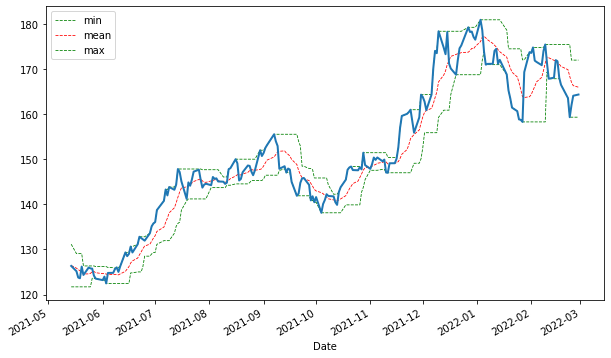

In [6]:
ax = AAPL_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [7]:
AAPL_data['SMA1'] = data[sym].rolling(window=20).mean()
AAPL_data['SMA2'] = data[sym].rolling(window=60).mean()
AAPL_data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL,SMA1,SMA2
Date,,,
2022-02-22,163.579987,169.039067,170.250946
2022-02-23,159.349121,169.063622,170.308345
2022-02-24,162.007080,169.225549,170.353207
2022-02-25,164.107590,169.515865,170.349231
2022-02-28,164.376358,169.267326,170.358516


<AxesSubplot:xlabel='Date'>

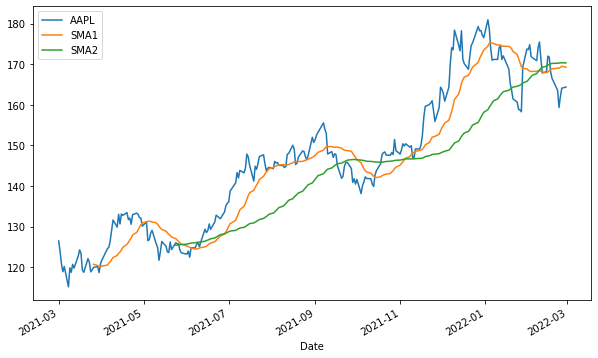

In [8]:
AAPL_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

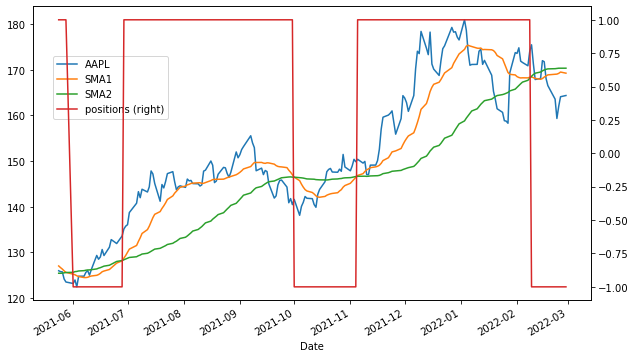

In [9]:
AAPL_data.dropna(inplace=True)
AAPL_data['positions'] = np.where(AAPL_data['SMA1'] > AAPL_data['SMA2'],1,-1)
ax = AAPL_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))